In [216]:
import numpy as np
import random as rand
import timeit as time
import statistics as stat
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

There are m.k multiplications when we calculate the dot product of one row of (n,k) matrix and m columns of (k,m). Therefore for n rows:\
Total number of multiplications = m.k.n

There are m.(k-1) additions when we calculate the dot product of one row of (n,k) matrix and m columns of (k,m). Therefore for n rows:\
Total number of additions = m.(k-1).n

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [217]:
n = 8
k = 10
m = 6

# initializing matrices a and b with random numbers from 1 to 9
a = []
for i in range(n):
  col = []
  for j in range(k):
    col.append(rand.randint(1,9))

  a.append(col)

b = []
for i in range(k):
  col = []
  for j in range(m):
    col.append(rand.randint(1,9))

  b.append(col)

# matrix to store the resultant matrix (zero matrix)
c = []
for i in range(n):
  col = []
  for j in range(m):
    col.append(0)
  c.append(col)


# Multiplication of matrix

# list method
def list_method(a,b,c):
  for i in range (len(a)):
    for j in range (len(b[0])):
      for x in range (len(a[0])):
        c[i][j] += a[i][x]*b[x][j]
  return c

# numpy method
def np_method(a,b):
  return np.dot(a,b)

print("a = ", a)
print("b =", b)

print("list method result = ", list_method(a,b,c))
print("numpy method result = ", np_method(a,b))

# Timing

time1 = []
time2 = []

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      c[i][j] = 0

  t0 = time.default_timer()
  result1 = list_method(a,b,c)
  t1 = time.default_timer()
  exec_time = (t1 - t0)*1000000
  time1.append(exec_time)


  t0 = time.default_timer() 
  result2 = np_method(a,b)
  t1 = time.default_timer()
  exec_time = (t1 - t0)*1000000
  time2.append(exec_time)

# average times
list_time = sum(time1)/len(time1)
np_time = sum(time2)/len(time2)

# rounding off till 2 decimal places
list_time = round(list_time,2)
np_time = round(np_time,2)

print("list method timing: ", list_time, " micro sec")
print("numpy method timing: ", np_time, " micro sec")


a =  [[2, 1, 6, 1, 6, 9, 9, 6, 2, 6], [4, 2, 2, 2, 8, 7, 7, 6, 4, 4], [1, 6, 8, 4, 8, 2, 4, 9, 2, 6], [6, 7, 3, 6, 9, 3, 1, 7, 6, 4], [1, 8, 8, 4, 2, 1, 6, 8, 3, 6], [3, 2, 1, 6, 3, 9, 5, 1, 7, 3], [2, 8, 2, 4, 3, 3, 9, 3, 4, 4], [6, 1, 2, 1, 4, 9, 5, 1, 1, 1]]
b = [[2, 3, 1, 8, 9, 6], [4, 2, 8, 2, 8, 2], [1, 7, 6, 6, 3, 5], [8, 7, 8, 7, 2, 3], [8, 2, 9, 2, 1, 1], [3, 8, 9, 3, 4, 2], [4, 5, 5, 8, 9, 3], [5, 3, 6, 9, 7, 3], [4, 1, 9, 6, 7, 2], [3, 5, 4, 8, 2, 8]]
list method result =  [[189, 236, 312, 286, 237, 168], [205, 193, 306, 265, 239, 145], [223, 210, 335, 291, 230, 173], [247, 189, 353, 288, 260, 166], [187, 202, 301, 293, 254, 174], [176, 190, 287, 224, 204, 122], [182, 172, 279, 242, 249, 135], [117, 155, 195, 167, 171, 101]]
numpy method result =  [[189 236 312 286 237 168]
 [205 193 306 265 239 145]
 [223 210 335 291 230 173]
 [247 189 353 288 260 166]
 [187 202 301 293 254 174]
 [176 190 287 224 204 122]
 [182 172 279 242 249 135]
 [117 155 195 167 171 101]]
list method ti

Numpy method is faster than list method. It is because numpy can do the calculations parallelly whereas list method calculates serially.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Let the size of an array be n. The time complexity to find the median of the array by repeated passing method would be O($n$^($\lceil$$n$/2$\rceil$)).\
A better method would be to use the sort function which would take O($n$$log(n)$) time and then finding the median in O(1) time.

In [218]:
# assume odd length array
num_arr = []
n2 = 501

for i in range(n2):
  num_arr.append(rand.randint(1,101))
copy_arr = num_arr.copy()
iter = n2//2

# (n/2) pass method
def pass_method(num_arr):
  for i in range(iter):
    max_num = num_arr[0]
    for j in range(1,len(num_arr)):
      if num_arr[j] > max_num:
        max_num = num_arr[j]

    num_arr.remove(max_num)

  max_num = num_arr[0]
  for p in range(1,len(num_arr)):
    if num_arr[p] > max_num:
      max_num = num_arr[p]
  return max_num

# sort method
def sort_method():
  num_arr.sort()
  return num_arr[iter]

# numpy.median method
def np_med():
  return np.median(num_arr)
  
print("Median by n//2 pass method: ", pass_method(copy_arr))
print("Median by sort method: ",sort_method())
print("Median by numpy.median method: ",int(np_med()))


# timing

time3 = []
time4 = []
time5 = []

for count in range(1000):
  copy_arr = num_arr.copy()

  t0 = time.default_timer()
  r3 = pass_method(copy_arr)
  t1 = time.default_timer()
  exe_time = (t1 - t0)*1000000
  time3.append(exe_time)


  t0 = time.default_timer() 
  r4 = sort_method()
  t1 = time.default_timer()
  exe_time = (t1 - t0)*1000000
  time4.append(exe_time)

  t0 = time.default_timer() 
  r5 = np_med()
  t1 = time.default_timer()
  exe_time = (t1 - t0)*1000000
  time5.append(exe_time)

# averaging and rounding off
ti3 = sum(time3)/len(time3)
ti4 = sum(time4)/len(time4)
ti5 = sum(time5)/len(time5)
ti3 = round(ti3,2)
ti4 = round(ti4,2)
ti5 = round(ti5,2)

print("timing for n//2 pass method: ", ti3, " micro sec")
print("timing for sort method: ", ti4, " micro sec")
print("timing for numpy.median method: ", ti5, " micro sec")

Median by n//2 pass method:  50
Median by sort method:  50
Median by numpy.median method:  50
timing for n//2 pass method:  4147.74  micro sec
timing for sort method:  4.36  micro sec
timing for numpy.median method:  99.79  micro sec


The order of time complexities is:\
repeated passing method >> numpy.median method > sort method.


**4. What is the gradient of the following function with respect to x and y?\
$x^2$$y$ $+$ $y^3$$sin$($x)$**


w.r.t. $x$, the gradient is $2xy$ $+$ $y^3$$cos(x)$\
w.r.t $y$, the gradient is $x^2$ $+$ $3y^2$$sin(x)$

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [219]:
# defining given function
def func(x, y):
  func = x**2*y + y**3*jnp.sin(x)
  return func

# manual gradients
def fx(x, y):
  return 2*x*y + y**3*jnp.cos(x)

def fy(x, y):
  return x**2 + 3*y**2*jnp.sin(x)

# using grad from JAX
df_dx = grad(func, argnums=0)
df_dy = grad(func, argnums=1)

for i in range(4):
  x = round(rand.uniform(0.0,10.0),2)
  y = round(rand.uniform(0.0,10.0),2)

  print("x =", x, "y =",y)
  print("gradinet wrt x JAX:",float(df_dx(x, y))," manual:",float(fx(x,y)))
  print("gradinet wrt y JAX:",float(df_dy(x, y))," manual:",float(fy(x,y)))

x = 2.89 y = 6.21
gradinet wrt x JAX: -196.04966735839844  manual: -196.04966735839844
gradinet wrt y JAX: 37.153316497802734  manual: 37.15331268310547
x = 9.23 y = 9.36
gradinet wrt x JAX: -631.734130859375  manual: -631.734130859375
gradinet wrt y JAX: 136.0631866455078  manual: 136.0631866455078
x = 0.34 y = 2.48
gradinet wrt x JAX: 16.06622886657715  manual: 16.06622886657715
gradinet wrt y JAX: 6.2688374519348145  manual: 6.2688374519348145
x = 1.51 y = 2.44
gradinet wrt x JAX: 8.251431465148926  manual: 8.251431465148926
gradinet wrt y JAX: 20.1079044342041  manual: 20.10790252685547


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [220]:
x = sy.symbols('x')
y = sy.symbols('y')

f = x**2*y + y**3*sy.sin(x)

dfdx = sy.diff(f, x)
dfdy = sy.diff(f, y)

print(dfdx)
print(dfdy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.** 

In [221]:
college = {}

college[2022] = {'Branch 1':{}, 'Branch 2':{}}
college[2023] = {'Branch 1':{}, 'Branch 2':{}}
college[2024] = {'Branch 1':{}, 'Branch 2':{}}
college[2025] = {'Branch 1':{}, 'Branch 2':{}}

college[2022]['Branch 1'] = {'Roll Number :1':{'Name':'N','Marks':{'Maths':100, 'English':70, 'Science':80}}}
college[2022]['Branch 1']['Roll Number: 2'] = {'Name':'O','Marks':{'Maths':90, 'English':80, 'Science':80}}
college[2023]['Branch 2'] = {'Roll Number :3':{'Name':'P','Marks':{'Maths':85, 'English':70, 'Science':95}}}
college[2025]['Branch 3'] = {}

print(college[2023])

{'Branch 1': {}, 'Branch 2': {'Roll Number :3': {'Name': 'P', 'Marks': {'Maths': 85, 'English': 70, 'Science': 95}}}}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

**$y$ $=$ $x$**

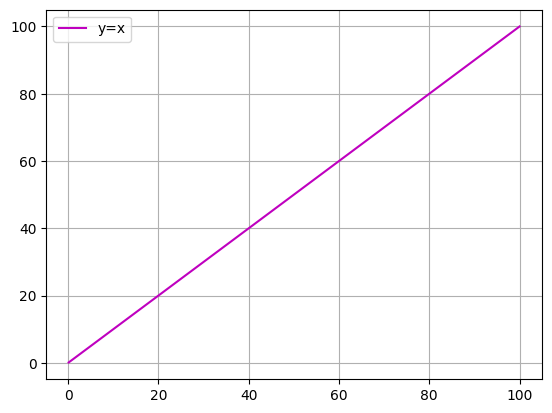

In [222]:
x = np.linspace(0.1,100)

y1 = x

plt.plot(x, y1, '-m', label='y=x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $x^2$**

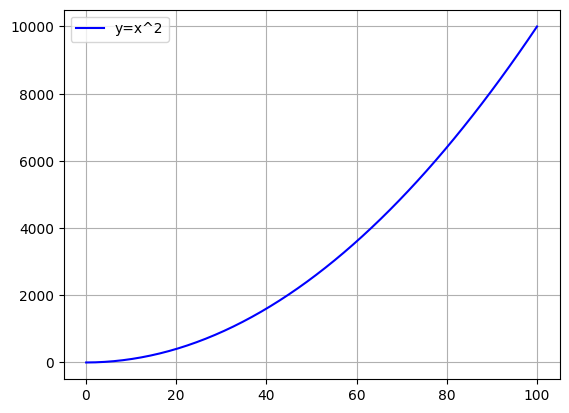

In [223]:
y2 = x**2

plt.plot(x, y2, '-b', label='y=x^2')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $x^3/100$**

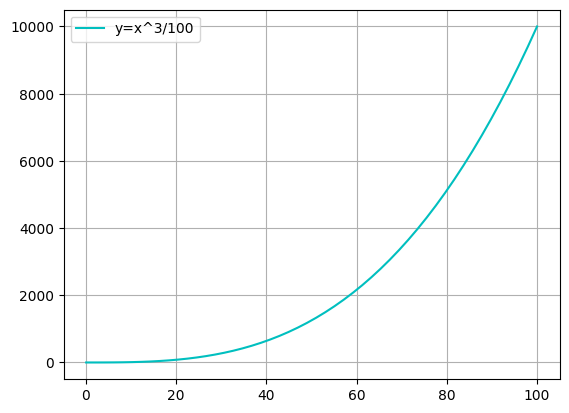

In [224]:
y3 = (x**3)/100

plt.plot(x, y3, '-c', label='y=x^3/100')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $sin(x)$, $y$ $=$ $sin(x)$$/$$x$**

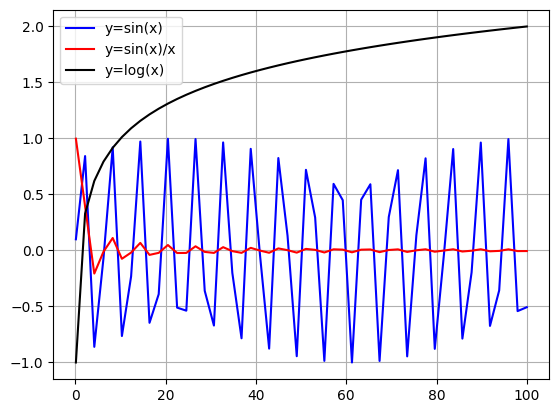

In [225]:
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log10(x)

plt.plot(x, y4, '-b', label='y=sin(x)')
plt.plot(x, y5, '-r', label='y=sin(x)/x')
plt.plot(x, y6, '-k', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $log(x)$**

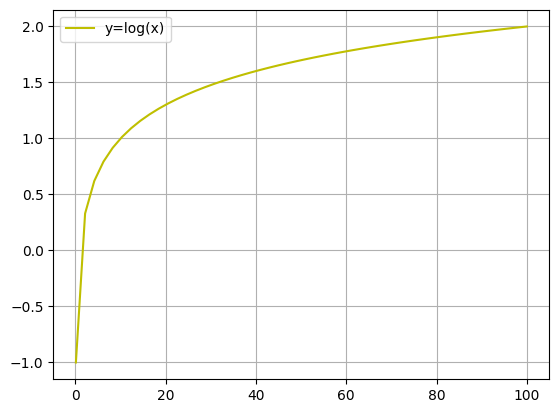

In [226]:
y6 = np.log10(x)

plt.plot(x, y6, '-y', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $e^x$**

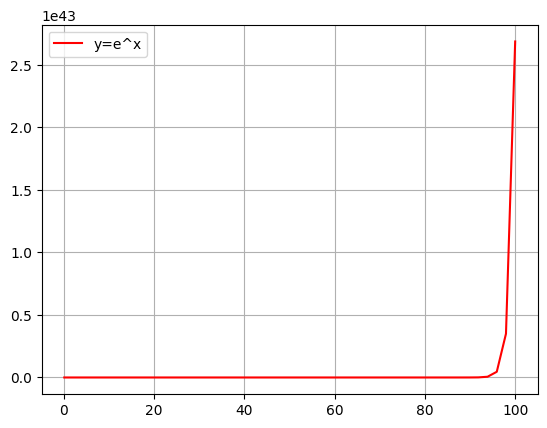

In [227]:
y7 = np.exp(x)
plt.plot(x, y7, '-r', label='y=e^x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [228]:
a = []
for i in range(20):
  col = []
  for j in range(5):
    col.append(rand.uniform(1.0,2.0))
  a.append(col)

df = pd.DataFrame(a, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

# highest standard deviation
a_std = df.std(axis=0)
max_std = a_std.idxmax()
print("Column with highest standard deviation :", max_std)

# lowest mean
a_mean = df.mean(axis=1)
min_mean = a_mean.idxmin()
print("Row with lowest mean:", min_mean)

           a         b         c         d         e
0   1.453324  1.405716  1.239714  1.056515  1.351264
1   1.524415  1.571206  1.956561  1.358073  1.356794
2   1.648712  1.270353  1.842411  1.335951  1.200740
3   1.552780  1.764282  1.309499  1.420028  1.749261
4   1.946561  1.038512  1.544292  1.103447  1.202736
5   1.170817  1.828654  1.476942  1.986693  1.078132
6   1.886730  1.278194  1.952931  1.169717  1.672535
7   1.503630  1.975320  1.177453  1.833927  1.148120
8   1.228164  1.169640  1.634837  1.081973  1.330945
9   1.054274  1.834103  1.357699  1.845521  1.449648
10  1.693247  1.648363  1.771689  1.035512  1.139529
11  1.025258  1.250372  1.630198  1.437523  1.162605
12  1.306732  1.268104  1.477565  1.488922  1.113672
13  1.723520  1.930854  1.518346  1.540164  1.122165
14  1.952973  1.813075  1.335549  1.687264  1.626919
15  1.978514  1.986321  1.053170  1.971196  1.753692
16  1.525869  1.993613  1.670620  1.202198  1.678640
17  1.294351  1.231418  1.190727  1.368235  1.

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [235]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df.loc[df['f'] < 8, 'g'] = 'LT8'
df.loc[df['f'] >= 8, 'g'] = 'GT8'

print(df)

           a         b         c         d         e         f    g
0   1.453324  1.405716  1.239714  1.056515  1.351264  6.506533  LT8
1   1.524415  1.571206  1.956561  1.358073  1.356794  7.767050  LT8
2   1.648712  1.270353  1.842411  1.335951  1.200740  7.298167  LT8
3   1.552780  1.764282  1.309499  1.420028  1.749261  7.795850  LT8
4   1.946561  1.038512  1.544292  1.103447  1.202736  6.835547  LT8
5   1.170817  1.828654  1.476942  1.986693  1.078132  7.541239  LT8
6   1.886730  1.278194  1.952931  1.169717  1.672535  7.960107  LT8
7   1.503630  1.975320  1.177453  1.833927  1.148120  7.638449  LT8
8   1.228164  1.169640  1.634837  1.081973  1.330945  6.445559  LT8
9   1.054274  1.834103  1.357699  1.845521  1.449648  7.541244  LT8
10  1.693247  1.648363  1.771689  1.035512  1.139529  7.288339  LT8
11  1.025258  1.250372  1.630198  1.437523  1.162605  6.505957  LT8
12  1.306732  1.268104  1.477565  1.488922  1.113672  6.654995  LT8
13  1.723520  1.930854  1.518346  1.540164  1.12

**12. Write a small piece of code to explain broadcasting in numpy.**

In [230]:
x = np.array([[10.0,10.0,10.0],
             [30.0,20.0,30.0]])
             
y = np.array([1.0,2.0,3.0])

print(x+y)

[[11. 12. 13.]
 [31. 22. 33.]]


size of x is (2,3) and size of y is (1,3).\
y[0, : ] is broadcast to its other row to make the sizes identical for addition. 

**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [234]:
number = int(input("Enter the size of the array: "))
a = list(map(int,input("\nEnter the numbers separated by space : ").strip().split()))[:number]
arr = np.array(a)

def f(arr):
  min = arr[0]
  ind = 0
  # calcuate argmin
  for h in range(1,number):
    if arr[h] < min:
      min = arr[h]
      ind = h
  return ind

print("index of min element (manually):", f(arr))
print("index of min element (np.argmin):",np.argmin(arr))

index of min element (manually): 2
index of min element (np.argmin): 2
